<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/generalized_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalized Linear Models

By Zia Ahmed, University At Buffalo

A generalized linear model (GLM) is a statistical framework that extends the traditional linear regression model to accommodate a broader range of response variables and model assumptions. The GLM allows for the response variable to follow a distribution other than the normal distribution, and allows for the relationship between the response variable and the predictor variables to be modeled using a nonlinear function.

The GLM consists of three components:

1.  The random component: specifies the distribution of the response variable (e.g., normal, Poisson, binomial, gamma, etc.). The distribution is chosen based on the nature of the response variable and the assumptions of the model.

2.  The systematic component: specifies the linear predictor function that relates the predictor variables to the response variable. The predictor function is modeled using a combination of linear and nonlinear functions.

3.  The link function: relates the expected value of the response variable to the linear predictor function. The link function can be used to transform the response variable to ensure that it follows the appropriate distribution for the model. For example, in logistic regression, which is used to model binary data, the link function is the logistic function, which maps the linear predictor to a probability between 0 and 1. In Poisson regression, which is used to model count data, the link function is the natural logarithm function, which maps the linear predictor to the mean of the Poisson distribution.

The GLM is a flexible framework that can be used for a wide range of statistical applications, including regression analysis, classification, and survival analysis. It allows for the modeling of complex relationships between the response variable and the predictor variables, and can accommodate both continuous and discrete response variables.

### Linear regression vs Generalized Linear Models

1.  Linear regression assumes that the response variable is normally distributed, while GLMs allow for different distributions, such as binomial or Poisson.

2.  Linear regression models the mean of the response variable as a linear function of the predictor variables, while GLMs model the relationship between the predictor variables and the response variable through a link function and a linear combination of the predictor variables.

3.  Linear regression is used for continuous response variables, while GLMs can be used for both continuous and categorical response variables.

4.  The assumptions of linear regression are more restrictive than those of GLMs, which makes GLMs more flexible and appropriate for a wider range of data.

In this exercise will fit GLM with:

1. [GLM with Caret Package](#glm-with-caret-package)

2. [GLM with tidymodel](#glm-with-tidymodel)

3. [GLM-with-h2o](#glm-with-h2o)

## Run R-Code in Google Colab


[Google Colab](https://colab.research.google.com/) is a cloud-based platform provided by Google for running and executing Python code. It is built on top of Jupyter Notebook and offers a free, convenient, and collaborative environment for data analysis, machine learning, and general-purpose Python programming. Colab allows you to create and share Jupyter notebooks that include code, text, images, and visualizations.

Key features of Google Colab include:

1.  **Free GPU and TPU Support:** Colab provides free access to a limited amount of GPU (Graphics Processing Unit) and TPU (Tensor Processing Unit) resources, which can significantly accelerate deep learning computations.

2.  **Collaborative Editing:** Multiple users can collaborate in real-time on the same Colab notebook, making it useful for team projects or sharing knowledge.

3.  **Google Drive Integration:** You can easily save and load files to and from your Google Drive, enabling seamless data storage and retrieval.

4.  **Rich Text and Media Support:** Colab notebooks support rich media integration, allowing you to include images, videos, and other multimedia elements in your notebooks.

5.  **Pre-installed Libraries:** Many popular Python libraries for data analysis, machine learning, and deep learning (e.g., NumPy, Pandas, TensorFlow, PyTorch) come pre-installed on Colab, reducing setup time.

6.  **Easy Sharing:** Colab notebooks can be easily shared with others by generating a shareable link. It's a convenient way to showcase your work or collaborate with others.

To get started with Google Colab, you can visit the official website at [**https://colab.research.google.com/**](https://colab.research.google.com/). You can either create a new notebook or open an existing one from your Google Drive. The notebooks run on virtual machines hosted by Google, and once you close the browser, the virtual machine and its contents are discarded, but your notebook will be automatically saved to your Google Drive.

Keep in mind that the available resources, such as GPU and TPU quotas, may be limited for free users. Also, the specific features and limitations of Google Colab may evolve over time, so it's always a good idea to check the official website or documentation for the latest information.

Although Google Colab is primarily designed for Python, it also supports R. You can run R code in a Colab notebook by creating an R runtime environment. Here's how you can set it up:

1.  Open Google Colab in your web browser at https://colab.research.google.com/.

2.  Click on the "File" menu and select "New notebook" to create a new notebook.

3.  In the toolbar, click on the "Runtime" menu and select "Change runtime type."

4.  In the dialog box that appears, select "R" from the "Runtime type" dropdown.

5.  Click on the "Save" button to apply the changes.

Once you have set up the R runtime environment, you can start writing and executing R code in the notebook cells. To run a code cell, press Shift+Enter or click on the "Play" button next to the cell.

You can install R packages in Colab by using the **install.packages()** function.

### Install rpy2

rpy2 is an interface to R running embedded in a Python process.

In [1]:
!pip install rpy2==3.5.1

## Activate R magic

In [2]:
%load_ext rpy2.ipython

### Data

In [ ]:
%%R
install.packages('tidyverse', repos='http://cran.rstudio.com/')

In [6]:
%%R
# load tidyverse
library(tidyverse)
# define data folder
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data_syn.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, TPI,MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()


✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Rows: 1408 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): NLCD, FRG
dbl (8): ID, SOC, DEM, Slope, TPI, MAP, MAT, NDVI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,408
Columns: 9
$ SOC   <dbl> 1.900, 2.644, 0.800, 0.736, 15.641, 8.818, 3.782, 6.641, 4.803, …
$ DEM   <dbl> 2825.1111, 2535.1086, 1716.3300, 1649.8933, 2675.3113, 2581.4839…
$ Slope <dbl> 18.981682, 14.182393, 1.585145, 9.399726, 12.569353, 6.358553, 1…
$ TPI   <dbl> -0.91606224, -0.15259802, -0.39078590, -2.54008722, 7.40076303, …
$ MAT   <dbl> 4.709227, 4.648000, 6.360833, 10.265385, 2.798550, 6.358550, 7.0…
$ MAP   <dbl> 613.6979, 597.7912, 201.5091, 298.2608, 827.4680, 679.1392, 508.…
$ NDVI  <dbl> 0.6845260, 0.7557631, 0.2215059, 0.2785148, 0.7337426, 0.7017139…
$ NLCD  <chr> "Forest", "Forest", "Shrubland", "Shrubland", "Forest", "For

## GLM with Caret Package

The Caret package (short for Classification And REgression Training) is a popular R package for machine learning. It provides a consistent interface to train and evaluate a wide range of machine learning models.The caret package in R provides a unified interface to train and tune machine learning models.

Some of the key features of the Caret package include:

1.  Data Preprocessing: It provides a comprehensive set of tools to preprocess the data, such as missing value imputation, feature scaling, feature selection, and data partitioning.

2.  Model Training: It supports a wide range of machine learning algorithms for classification, regression, and survival analysis, including decision trees, random forests, support vector machines, gradient boosting, and neural networks.

3.  Model Tuning: It provides tools for tuning the hyperparameters of the models using various techniques such as grid search, random search, and Bayesian optimization.

4.  Model Evaluation: It provides tools for evaluating the performance of the models using various metrics such as accuracy, AUC, F1-score, and log-loss.

In [ ]:
%%R
# sudo apt-get update
# sudo apt-get install r-cran-caret
install.packages('caret', repos='http://cran.rstudio.com/')

#### Create Dummy Variables

dummyVars() creates a full set of dummy variables (i.e. less than full rank parameterization)

In [7]:
%%R
library(caret)
dummies <- dummyVars(SOC ~ ., data = df)
dummies.df<-as.data.frame(predict(dummies, newdata = df))
dummies.df$SOC<-df$SOC


Attaching package: ‘caret’



    lift




#### Data Splitting

The function createDataPartition can be used to create balanced splits of the data

In [9]:
%%R
trainIndex <- createDataPartition(dummies.df$SOC, p = .80,
                                  list = FALSE,
                                  times = 1)
df_train <- dummies.df[ trainIndex,]
df_test  <- dummies.df[-trainIndex,]

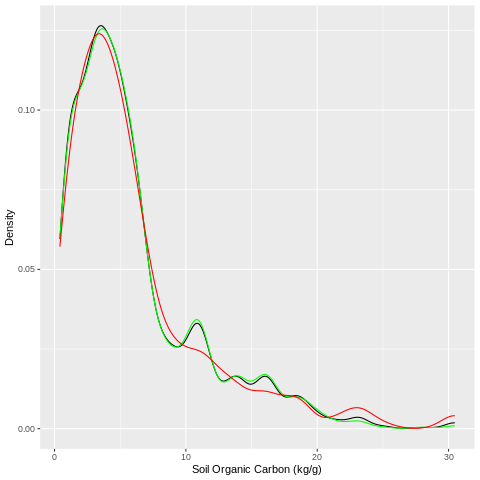

In [10]:
# Density plot all, train and test data
%%R
ggplot()+
  geom_density(data = dummies.df, aes(SOC))+
  geom_density(data = df_train, aes(SOC), color = "green")+
  geom_density(data = df_test, aes(SOC), color = "red") +
      xlab("Soil Organic Carbon (kg/g)") +
     ylab("Density")

#### Set control prameters

traincontrol() is is used for controlling the training process. It allows us to specify various options related to resampling, cross-validation, and model tuning during the training process.

In [11]:
%%R
set.seed(123)
train.control <- trainControl(method = "repeatedcv",
                              number = 10, repeats = 5,
                              preProc = c("center", "scale", "nzv"))

#### Train the model

train() is used for training machine learning models. It provides a unified interface for a wide range of machine learning algorithms, making it easier to compare and evaluate different models on a given dataset. The train() function takes a formula and a dataset as input, and allows you to specify the type of model to train, as well as various tuning parameters and performance metrics. It uses a resampling method specified by trainControl() to estimate the performance of the model on new, unseen data, and returns a trained model object.

In [12]:
%%R
model.glm <- train(SOC ~., data = df_train,
                     method = "glm",
                     trControl = train.control)

In [13]:
%%R
print(model.glm)

Generalized Linear Model 

1127 samples
  16 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1014, 1015, 1014, 1015, 1014, 1014, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  3.78864  0.3999673  2.710722



#### Training Performance

In [14]:
%%R
getTrainPerf(model.glm)

  TrainRMSE TrainRsquared TrainMAE method
1   3.78864     0.3999673 2.710722    glm


#### Prediction

In [15]:
%%R
df_test$Pred.SOC = predict(model.glm, df_test)

### Prediction Performance

In [ ]:
%%R
install.packages("Metrics", repos='http://cran.rstudio.com/')

In [19]:
%%R
library(Metrics)
RMSE<- Metrics::rmse(df_test$SOC, df_test$Pred.SOC)
MAE<- Metrics::mae(df_test$SOC, df_test$Pred.SOC)

# Print results
paste0("RMSE: ", round(RMSE,2))

[1] "MAE: 2.96"


In [20]:
%%R
paste0("MAE: ", round(MAE,2));

[1] "MAE: 2.96"


We can plot observed and predicted values with fitted regression line with ggplot2

`geom_smooth()` using formula = 'y ~ x'


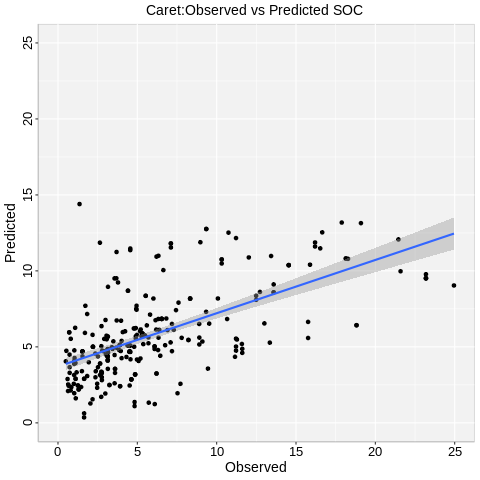

In [57]:
%%R
ggplot(df_test, aes(SOC,Pred.SOC)) +
  geom_point() +
  geom_smooth(method = "lm")+
  ggtitle("Caret:Observed vs Predicted SOC ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### GLM with tidymodels

Tidymodels is a collection of R packages for modeling and machine learning using a tidyverse approach. The tidyverse is a set of R packages that share a common philosophy of data manipulation and visualization. Tidymodels extends this philosophy to modeling by providing a consistent set of functions for modeling, resampling, and tuning models.

The core packages in tidymodels include:

**parsnip**: A package for creating a consistent interface to different model types.

**dials**: A package for tuning model hyperparameters using a tidy interface.

**rsample**: A package for resampling data to estimate model performance.

**recipes**: A package for preprocessing data in a tidy way.

**infer**: A package for statistical inference using tidy data principles.

These packages can be used together or separately to build and evaluate models using a tidy workflow. Tidymodels also integrates with other tidyverse packages like ggplot2 for visualization and purrr for functional programming.

Overall, tidymodels provides a comprehensive framework for building, tuning, and evaluating machine learning models in R while following the principles of the tidyverse.

The steps in most machine learning projects with tidy model are as follows:

-   Loading necessary packages and data

-   split data into train and test ({rsample})

-   light preprocessing ({recipes})

-   find the best hyperparameters by

    -   creating crossvalidation folds ({rsample})

    -   creating a model specification ({tune, parsnip, treesnip, dials})

    -   creating a grid of values ({dials})

    -   using a workflow to contain the model and formula ({workflows})

    -   tune the model ({tune})

    -   find the best model from tuning

-   retrain on entire test data

-   evaluate on test data ({yardstick})

-   check residuals and model diagnostics

In [ ]:
%%R
install.packages('tidymodels', repos='http://cran.rstudio.com/')

### Split Data

We use **rsample** package, install with **tidymodels**, to split data into training (70%) and test data (30%) set with Stratified Random Sampling. initial_split() creates a single binary split of the data into a training set and testing set.

::: callout-note
Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.


✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

✖ yardstick::accuracy()    masks Metrics::accuracy()
✖ scales::discard()        masks purrr::discard()
✖ dplyr::filter()          masks stats::filter()
✖ recipes::fixed()         masks stringr::fixed()
✖ dplyr::lag()             masks stats::lag()
✖ caret::lift()            masks purrr::lift()
✖ yardstick::mae()         masks Metrics::mae()
✖ yardstick::mape()        masks Metrics::mape()
✖ yardstick::mase()        masks Metrics::mase()
✖ yardstick::precision()   masks Metrics::precision(), caret::precision()
✖ yardstick::recall()      masks Metrics::recall(), caret::recall()
✖ yardstick::rmse()        masks Metrics::rmse()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::smape()       masks Metrics::smape()
✖ yardstick::spec()        masks readr::spec()
✖ yar

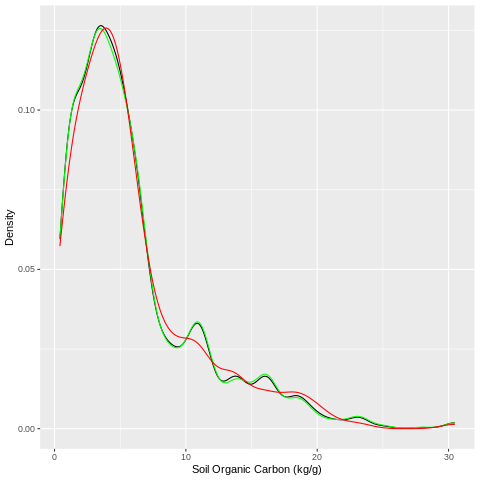

In [24]:
%%R
library(tidymodels)
set.seed(1245)   # for reproducibility
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()

# Density plot all, train and test data
ggplot()+
  geom_density(data = df, aes(SOC))+
  geom_density(data = train, aes(SOC), color = "green")+
  geom_density(data = test, aes(SOC), color = "red") +
      xlab("Soil Organic Carbon (kg/g)") +
     ylab("Density")

### Create Recipe

A recipe is a description of the steps to be applied to a data set in order to prepare it for data analysis. Before training the model, we can use a recipe to do some preprocessing required by the model.

In [25]:
%%R
# Create a recipe
glm_recipe <-
  recipe(SOC ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_numeric_predictors())

### Build a model

set_engine() is used to specify which package or system will be used to fit the model, along with any arguments specific to that software. We will use "glm" without any regularization parameters

In [26]:
%%R
glm_mod <-
   linear_reg() %>%
   set_engine("glm")

### Creatae a workflow

A workflow is a container object that aggregates information required to fit and predict from a model. This information might be a recipe used in preprocessing, specified through add_recipe(), or the model specification to fit, specified through add_model().

In [27]:
%%R
glm_wflow <-
  workflow() %>%
  add_model(glm_mod) %>%
  add_recipe(glm_recipe)

### Fit GLM model

Now, there is a single function that can be used to prepare the recipe and train the model from the resulting predictors:

In [28]:
%%R
glm_fit <-
  glm_wflow %>%
  fit(data = train)

This object has the finalized recipe and fitted model objects inside. You may want to extract the model or recipe objects from the workflow. To do this, you can use the helper functions extract_fit_parsnip():

In [29]:
%%R
glm_fit %>%
  extract_fit_parsnip() %>%
  tidy()

# A tibble: 15 × 5
   term                      estimate std.error statistic   p.value
   <chr>                        <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)                 6.06       0.116    52.3   7.22e-302
 2 DEM                        -0.0532     0.295    -0.181 8.57e-  1
 3 Slope                       0.594      0.197     3.01  2.70e-  3
 4 TPI                         0.0886     0.123     0.717 4.73e-  1
 5 MAT                        -0.900      0.222    -4.05  5.38e-  5
 6 MAP                         0.850      0.186     4.57  5.35e-  6
 7 NDVI                        1.56       0.224     6.97  5.52e- 12
 8 NLCD_Herbaceous            -0.671      0.261    -2.57  1.04e-  2
 9 NLCD_Planted.Cultivated    -0.832      0.235    -3.54  4.12e-  4
10 NLCD_Shrubland             -0.335      0.231    -1.45  1.48e-  1
11 FRG_Fire.Regime.Group.II    0.613      0.359     1.71  8.83e-  2
12 FRG_Fire.Regime.Group.III  -0.0725     0.266    -0.272 7.85e-  1
13 FRG_Fire.Regime.Group.IV  

### Prediction

In [30]:
%%R
test_df<-as.data.frame(test)
test_df$GLM.SOC<-predict(glm_fit, new_data = test)


In [32]:
%%R
GLM.RMSE<- Metrics::rmse(test_df$SOC, test_df$GLM.SOC$.pred)
GLM.MAE<- Metrics::mae(test_df$SOC, test_df$GLM.SOC$.pred)


In [33]:
%%R
paste0("GLM.RMSE: ", round(GLM.RMSE,2))

[1] "GLM.RMSE: 3.82"


In [34]:
%%R
paste0("GLM.MAE: ", round(GLM.MAE,2))

[1] "GLM.MAE: 2.72"


## GLM with h20

The H2O package is an open-source software for data analysis and machine learning. It is designed to be fast, scalable, and easy to use. The package can be used in R, Python, and other programming languages, and it provides a variety of machine learning algorithms, including deep learning, gradient boosting, generalized linear models, and others.

H2O is particularly well-suited for large datasets and can run on a single machine or a distributed cluster. It also offers automated machine learning (AutoML) capabilities, which can help users select the best algorithm and hyperparameters for their data.

Some of the key features of the H2O package include:

1.  Distributed computing: H2O can run on a cluster of machines and scale up to handle very large datasets. GPU acceleration: H2O supports GPU acceleration for certain algorithms, which can significantly speed up computation.

2.  Automated machine learning: H2O's AutoML feature can automatically select the best algorithm and hyperparameters for a given dataset.

3.  Interpretable machine learning: H2O provides tools for interpreting machine learning models and understanding their predictions.

4.  Integration with popular programming languages: H2O can be used with R, Python, and other programming languages, making it accessible to a wide range of users.

The h2o package provides an open-source implementation of GLM that is specifically designed for big data. To use the GLM function in h2o, you will need to first install and load the package in your R environment. Once the package is loaded, you can use the h2o.glm() function to fit a GLM model.

#### Downloading & Installing H2O

Detail instruction of downloading & installing H2O in R could be found [here](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html)

Anyway, perform the following steps in R to install H2O. Copy and paste these commands one line at a time.

1.  The following two commands remove any previously installed H2O packages for R.

> if ("package:h2o" %in% search()) { detach("package:h2o", unload=TRUE) }

> if ("h2o" %in% rownames(installed.packages())) { remove.packages("h2o") }

2.  Next, download packages that H2O depends on

> pkgs \<- c("RCurl","jsonlite")

> for (pkg in pkgs) { if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) } }

3.  Download and install the H2O package for R.

> install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

In [ ]:
%%R
pkgs <- c("RCurl","jsonlite")
for (pkg in pkgs) {
  if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }
}

In [ ]:
%%R
install.packages("h2o", type="source", repos=(c("http://h2o-release.s3.amazonaws.com/h2o/latest_stable_R")))

### Data

In [36]:
%%R
library(tidyverse)
# define file from my github
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data_syn.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, TPI,MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

Rows: 1408 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): NLCD, FRG
dbl (8): ID, SOC, DEM, Slope, TPI, MAP, MAT, NDVI

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1,408
Columns: 9
$ SOC   <dbl> 1.900, 2.644, 0.800, 0.736, 15.641, 8.818, 3.782, 6.641, 4.803, …
$ DEM   <dbl> 2825.1111, 2535.1086, 1716.3300, 1649.8933, 2675.3113, 2581.4839…
$ Slope <dbl> 18.981682, 14.182393, 1.585145, 9.399726, 12.569353, 6.358553, 1…
$ TPI   <dbl> -0.91606224, -0.15259802, -0.39078590, -2.54008722, 7.40076303, …
$ MAT   <dbl> 4.709227, 4.648000, 6.360833, 10.265385, 2.798550, 6.358550, 7.0…
$ MAP   <dbl> 613.6979, 597.7912, 201.5091, 298.2608, 827.4680, 679.1392, 508.…
$ NDVI  <dbl> 0.6845260, 0.7557631, 0.2215059, 0.2785148, 0.7337426, 0.7017139…
$ NLCD  <chr> "Forest", "Forest", "Shrubland", "Shrubland", "Forest", "For

### Convert to factor

In [37]:
%%R
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)

### Data split

In [38]:
%%R
library(tidymodels)
set.seed(1245)   # for reproducibility
split.df <- initial_split(df, prop = 0.8, strata = SOC)
train.df <- split.df %>% training()
test.df <-  split.df %>% testing()

### Import h2o

In [43]:
%%R
library(h2o)
h2o.init()
#disable progress bar for RMarkdown
h2o.no_progress()
# Optional: remove anything from previous session
h2o.removeAll()

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------


Attaching package: ‘h2o’



    cor, sd, var



    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpyUnB58/file39a245ac24b/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpyUnB58/file39a1461031c/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: ... Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 707 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.42.0.2 
    H2O cluster version age:    4 hours and 59 minutes 
    H2O cluster name:           H2O_started_from_R_root_yqz807 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version: 

#### Import data to h2o cluster

In [44]:
%%R
h_df=as.h2o(df)
h_train = as.h2o(train.df)
h_test = as.h2o(test.df)

In [45]:
%%R
CV.xy<- as.data.frame(h_train)
test.xy<- as.data.frame(h_test)

### Define response and predictors

In [46]:
%%R
y <- "SOC"
x <- setdiff(names(h_df), y)

### Fit a GLM

In [47]:
%%R
glm_h2o <- h2o.glm(                    ## h2o.glm function
  training_frame = h_train,            ## the H2O frame for training
  # validation_frame = valid,          ## the H2O frame for validation (not required)
  x=x,                                 ## the predictor columns, by column index
  y=y,                                 ## the target index (what we are predicting)
  model_id = "GLM_MODEL_ID",           ## name the model in H2O
                                       ## not required, but helps use Flow
  family = "gaussian",                 ## Family. Use binomial for classification with
                                       ## logistic regression, others are for regression problems.
                                       ## Must be one of: "AUTO", "gaussian", "binomial",
                                       ## "fractionalbinomial", "quasibinomial", "ordinal",
                                       ## "multinomial", "poisson", "gamma", "tweedie",
                                       ## "negativebinomial".
                                       ## Defaults to AUTO
  compute_p_values = TRUE,             ## Logical. Request p-values computation, p-values
                                       ## work only with IRLSM solver and no regularization
                                       ## Defaults to FALSE.
  nfolds = 10,                         ## umber of folds for K-fold cross-validation
                                       ## (0 to disable or >= 2).
                                       ## Defaults to 0.
  keep_cross_validation_models = TRUE, ## logical. Whether to keep the cross-validation models.
                                       ## Defaults to TRUE.
  early_stopping = TRUE,               ## Logical. Stop early when there is no more relative
                                       ## improvement on train or validation (if provided)
                                       ## Defaults to TRUE.
  stopping_rounds = 2,                 ## Early stopping based on convergence of stopping_metric.                                         ## Stop if simple moving average of length k
                                       ## of the stopping_metric does not improve for
                                       ## k:=stopping_rounds scoring events (0 to disable)
                                       ## Defaults to 0.
  stopping_metric = "RMSE",            ## Metric to use for early stopping
  remove_collinear_columns = TRUE,     ## Logical. In case of linearly dependent columns,
                                       ## remove some of the dependent columns Defaults to FALSE.
   standardize = TRUE,                 ## Logical. Standardize numeric columns to have zero mean                                          ## and unit variance
                                       ## Defaults to TRUE.
  seed = 212)                          ## Set the random seed so that this can be
                                       ## reproduced.

### Coefficients table

In [48]:
%%R
glm_h2o@model$coefficients_table

Coefficients: glm coefficients
                       names coefficients std_error   z_value  p_value
1                  Intercept    -0.365883  1.765136 -0.207283 0.835827
2    FRG.Fire Regime Group I     0.534452  1.447050  0.369339 0.711946
3   FRG.Fire Regime Group II     1.759501  1.340118  1.312944 0.189473
4  FRG.Fire Regime Group III     0.362598  1.349955  0.268600 0.788287
5   FRG.Fire Regime Group IV     0.467249  1.350144  0.346073 0.729353
6    FRG.Fire Regime Group V     0.673536  1.453193  0.463487 0.643106
7      FRG.Indeterminate FRG     0.000000        NA        NA       NA
8                NLCD.Forest     0.733379  0.506133  1.448984 0.147624
9            NLCD.Herbaceous    -0.710060  0.401525 -1.768410 0.077267
10   NLCD.Planted/Cultivated    -1.562316  0.546477 -2.858888 0.004331
11            NLCD.Shrubland     0.000000        NA        NA       NA
12                       DEM    -0.000081  0.000447 -0.180596 0.856718
13                     Slope     0.115020  0.0

### Retrieve a graphical plot of the standardized coefficient magnitudes

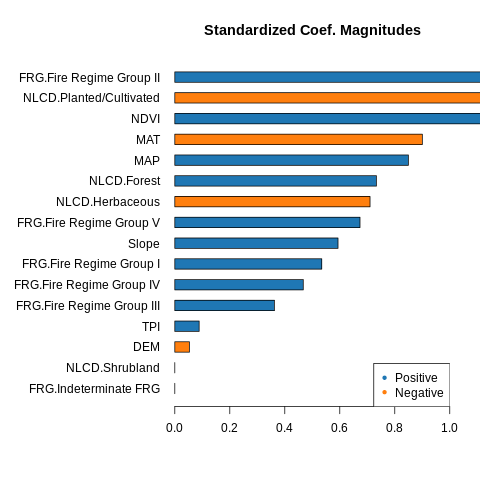

In [58]:
%%R
h2o.std_coef_plot(glm_h2o)

### Model Performance

In [50]:
%%R
# training
h2o.performance(glm_h2o, h_train)

H2ORegressionMetrics: glm

MSE:  14.58171
RMSE:  3.8186
MAE:  2.722561
RMSLE:  0.536385
Mean Residual Deviance :  14.58171
R^2 :  0.4007246
Null Deviance :6862.507
Null D.o.F. :281
Residual Deviance :4112.042
Residual D.o.F. :267
AIC :1587.976



In [51]:
%%R
# CV-performance
h2o.performance(glm_h2o, xval=TRUE)

H2ORegressionMetrics: glm
** Reported on cross-validation data. **
** 10-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  15.38733
RMSE:  3.922669
MAE:  2.796341
RMSLE:  0.536507
Mean Residual Deviance :  15.38733
R^2 :  0.3959658
Null Deviance :28740.84
Null D.o.F. :1125
Residual Deviance :17326.14
Residual D.o.F. :1111
AIC :6305.421



In [52]:
%%R
# test performance
h2o.performance(glm_h2o, h_test)

H2ORegressionMetrics: glm

MSE:  14.58171
RMSE:  3.8186
MAE:  2.722561
RMSLE:  0.536385
Mean Residual Deviance :  14.58171
R^2 :  0.4007246
Null Deviance :6862.507
Null D.o.F. :281
Residual Deviance :4112.042
Residual D.o.F. :267
AIC :1587.976



### Prediction

In [53]:
%%R
pred.glm <- as.data.frame(h2o.predict(object = glm_h2o, newdata = h_test))
test_data<-as.data.frame(h_test)
test_data$GLM_SOC<-pred.glm$predict

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


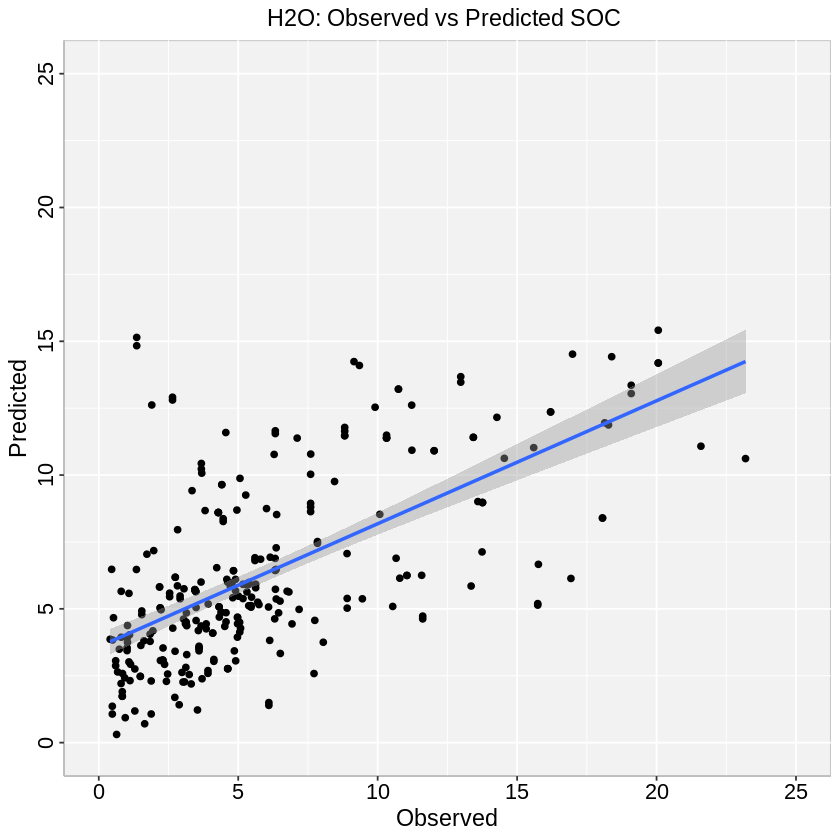

In [ ]:
ggplot(test_data, aes(SOC,GLM_SOC)) +
  geom_point() +
  geom_smooth(method = "lm")+
  #stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("H2O: Observed vs Predicted SOC ") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))